# **Blockchain Scrapers**
### Goal:
The goal of this project is to scrape relevant information from 2 blockchain related websites. I have chosen to extract article related data from www.cryptoslate.com and company record data from www.glyph.social. These websites contain a nice amount of clean blockchain related data so they are ideal candidates for scraping. I will use the Scrapy Python framework because it provides an easy way to scrape large amounts of data in a clean and comprehensible manner. The data will be stored in a MongoDB database because of its relatively effortless intergration with Scrapy. It is also a NoSQL database which is ideal for unstructured data.
### Strategy:
The strategy implemented for extracting data from these websites is as follows:
- Check the website's robots.txt file for any exposed sitemaps (They are easier to scrape).
- Since both sites have open sitemaps I will implement Scrapy's SitemapSpider to easily gather relevant urls.
- Extract all the relevant data from the urls with scrapy and xpath.
- Create a pipline that will store all items in a MongoDB Database.
- Have the raw html of each page downloaded and stored locally in a pickle format together with the url it came from. This strategy should help keep things more organized in storage while also reducing the size of each file saved.
- Export the collections from the mongo database into a csv file using mongoexport.
- Use Pandas to read back the data gathered in the CSV files.

### Requirements:
- Python3
- MongoDB 6.0 or higher
- mongoexport

### Installation:
In the project directory:
- `pip install -r requirements.txt`

### Example Usage:
1. In the terminal, make sure you are in the blockchain_scrapers directory.
2. Startup your MongoDB database on localhost port 27017

- Crawl cryptoslate: `scrapy crawl cryptoslate`
- Crawl glyph.social: `scrapy crawl glyph_social`
- Focus crawling by category on cryptoslate: `scrapy crawl cryptoslate -a category='<desired category>'` 
- Focus crawling by company on glyphsocial: `scrapy crawl glyph_social -a company='<desired company>'` 

### Notes:
- All output is sent to the terminal and stored in the mongoDB database. You can store the extracted items in a json file by adding `-o <file name>.json` at the end of the above commands.
- A download delay of 3 seconds has been implemented for both scrapers so we don't overwhelm the sites we are scraping.
- The scrapers were designed on Windows 11 and have not been tested on Linux based systems. However, they were writen with linux systems in mind so they should run fine on Linux.


Reading the data from the MongoDB database into a CSV file can be easily done by running the following command with mongoexport:

```
mongoexport --db=<database_name> --collection=<collection_name> --type=csv 
                --fields=<field_names comma seperated> --out=<file_name>.csv
```

For example, if we wanted to extract the relevant data from our glyphsocial database we would do the following:

In [ ]:
!mongoexport --db=glyphsocial --collection=company_records --type=csv --fields=url,legal_name,category,headquarters,founding_year,founding_team,facebook,linkedin,twitter,website,description --out=output_glyphsocial.csv

After running this command we should see an output similar to this:
```
2022-08-29T12:39:39.212-0400    connected to: mongodb://localhost/
2022-08-29T12:39:39.221-0400    exported 115 records
```
We can then find our generated csv in the directory from which the command was executed. I have included 2 sample csv files with data generated by the scrapers. We can verify the data in the csv by using the Pandas libray. Since there are many columns in the csv and many of them are lengthy, I will only be verifying the first few columns.

In [14]:
import pandas as pd

pd.read_csv('output_glyphsocial.csv',usecols=['url','legal_name','category','headquarters','founding_year'])

,url,legal_name,category,headquarters,founding_year
0,https://www.glyph.social/companies/aisot,aisot,Blockchain,United States,2019
1,https://www.glyph.social/companies/hihi,HiHi!,Blockchain,China,2018
2,https://www.glyph.social/companies/elevatyr,Elevatyr,Blockchain,United States,2017
3,https://www.glyph.social/companies/sqoin,Sqoin,Blockchain,United Kingdom,2018
4,https://www.glyph.social/companies/fullvision,Fullvision,Blockchain,United States,2019
...,...,...,...,...,...
110,https://www.glyph.social/companies/alium-finance,Alium Finance,Blockchain,Czech Republic,2021
111,https://www.glyph.social/companies/node-capital,Node Capital,Blockchain,United Kingdom,2017
112,https://www.glyph.social/companies/ramp,Ramp,Blockchain,United States,2018
113,https://www.glyph.social/companies/cryptiswap,CryptiSwap,Blockchain,United Kingdom,2021


In [15]:
pd.read_csv('output.csv',usecols=['author','topic','time_published'])

,topic,author,time_published
0,Regulation,Samuel Wan,"Aug. 18, 2022 at 10:30 am UTC"
1,Research,Liam 'Akiba' Wright,"Aug. 12, 2022 at 6:30 pm UTC"
2,Analysis,Andjela Radmilac,"Aug. 16, 2022 at 6:00 am UTC"
3,Merge,Oluwapelumi Adejumo,"Aug. 17, 2022 at 1:15 pm UTC"
4,DAOs,Oluwapelumi Adejumo,"Aug. 17, 2022 at 11:30 am UTC"
5,Merge,Samuel Wan,"Aug. 17, 2022 at 2:00 pm UTC"
6,Merge,Oluwapelumi Adejumo,"Aug. 24, 2022 at 10:20 am UTC"
7,Interview,Liam 'Akiba' Wright,"May. 1, 2022 at 8:00 am UTC"
8,Analysis,Oluwapelumi Adejumo,"Jul. 25, 2022 at 8:10 pm UTC"
9,Adoption,Assad Jafri,"Feb. 17, 2022 at 6:00 pm UTC"


We can go further by analyzing the data in the csv files to generate meaningful insights about the data we have collected.


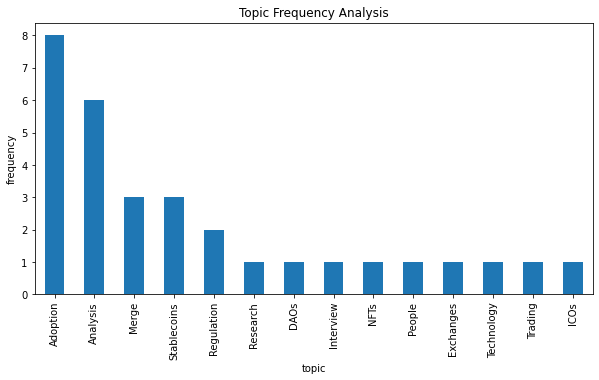

In [16]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('output.csv',usecols=['topic'])

plt.figure(figsize=(10,5))
plt.title('Topic Frequency Analysis')
df['topic'].value_counts().plot(kind='bar',xlabel='topic',ylabel='frequency')

plt.show()
